In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import scipy
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data,targets=load_breast_cancer(return_X_y=True)
data_train,data_test,targets_train,targets_test=train_test_split(data,targets,test_size=0.5,random_state=1)

In [5]:
print(data_train.shape,targets_test.shape)
num_train,_=data_train.shape

(284, 30) (285,)


In [29]:
data1=data_train[targets_train==0]
data2=data_train[targets_train==1]
print(data1.shape,data2.shape)
num_train1,_=data1.shape
num_train2,_=data2.shape
num_test,_=data_test.shape

(109, 30) (175, 30)


In [23]:
mean1=np.mean(data1,axis=0)
mean2=np.mean(data2,axis=0)
print(np.dot((data1-mean1).T,(data1-mean1)).shape)

(30, 30)


In [24]:
s1=np.dot((data1-mean1).T,(data1-mean1))/num_train1
s2=np.dot((data2-mean2).T,(data2-mean2))/num_train2

In [25]:
sw=s1+s2
sw_inv=np.linalg.inv(sw)

In [26]:
w=np.dot(sw_inv,mean1-mean2)

In [39]:
y1=np.dot(data1,w)
y2=np.dot(data2,w)

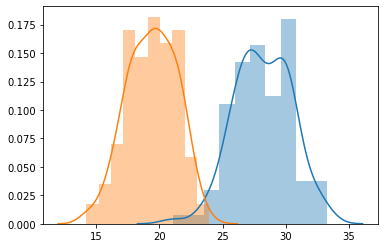

In [47]:
sns.distplot(y1)
sns.distplot(y2)

In [45]:
y_test=np.dot(data_test,w)

In [50]:
mean=(mean1+mean2)/2
y_threshold=np.dot(mean,w)
y1_test=y_test[y_test>=y_threshold]
y2_test=y_test[y_test<y_threshold]

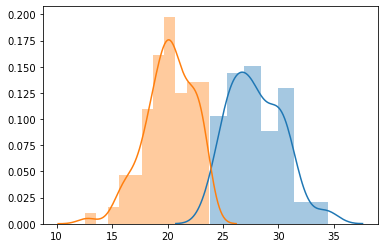

In [52]:
sns.distplot(y1_test)
sns.distplot(y2_test)

In [55]:
correct=0
for i in range(num_test):
    if y_test[i]>=y_threshold and targets_test[i]==0:
        correct+=1
    elif y_test[i]<y_threshold and targets_test[i]==1:
        correct+=1
        
print('正解率は：',correct*100/num_test)

正解率は： 94.03508771929825
